In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import combinations
from statsmodels.tsa.stattools import coint

## Defining our stock universe
here we have included stocks from media and entertainment industry

In [20]:
stocks = [
    "DIS",   # The Walt Disney Company
    "NFLX",  # Netflix, Inc.
    "CMCSA", # Comcast Corporation
    "FOX",   # Fox Corporation (Class B)
    "FOXA",  # Fox Corporation (Class A)
    "WBD",   # Warner Bros. Discovery, Inc.
    "ROKU",  # Roku, Inc.
    "SPOT",  # Spotify Technology S.A.
    "LYV"    # Live Nation Entertainment, Inc.
]

## Fetching stock data from yFinance

In [34]:
import yfinance as yf
yf.set_tz_cache_location('disable')

data_dict = {}

for ticker in stocks:
    print(f"Download data for: {ticker}")
    yfticker = yf.Ticker(ticker)
    df = yfticker.history(
        period='5y',
        interval='1d',
        auto_adjust=True
    )
    data_dict[ticker] = df

Download data for: DIS
Download data for: NFLX
Download data for: CMCSA
Download data for: FOX
Download data for: FOXA
Download data for: WBD
Download data for: ROKU
Download data for: SPOT
Download data for: LYV


## Unique Pairs (Combinations)
The first step in identifying cointegrated pairs of stocks in our search space is to generate a list of unique pairs of stocks from the stocks list, this can be done by `combinations`

In [35]:
stock_pairs = list(combinations(stocks, 2))
stock_pairs

[('DIS', 'NFLX'),
 ('DIS', 'CMCSA'),
 ('DIS', 'FOX'),
 ('DIS', 'FOXA'),
 ('DIS', 'WBD'),
 ('DIS', 'ROKU'),
 ('DIS', 'SPOT'),
 ('DIS', 'LYV'),
 ('NFLX', 'CMCSA'),
 ('NFLX', 'FOX'),
 ('NFLX', 'FOXA'),
 ('NFLX', 'WBD'),
 ('NFLX', 'ROKU'),
 ('NFLX', 'SPOT'),
 ('NFLX', 'LYV'),
 ('CMCSA', 'FOX'),
 ('CMCSA', 'FOXA'),
 ('CMCSA', 'WBD'),
 ('CMCSA', 'ROKU'),
 ('CMCSA', 'SPOT'),
 ('CMCSA', 'LYV'),
 ('FOX', 'FOXA'),
 ('FOX', 'WBD'),
 ('FOX', 'ROKU'),
 ('FOX', 'SPOT'),
 ('FOX', 'LYV'),
 ('FOXA', 'WBD'),
 ('FOXA', 'ROKU'),
 ('FOXA', 'SPOT'),
 ('FOXA', 'LYV'),
 ('WBD', 'ROKU'),
 ('WBD', 'SPOT'),
 ('WBD', 'LYV'),
 ('ROKU', 'SPOT'),
 ('ROKU', 'LYV'),
 ('SPOT', 'LYV')]

## Identifying Cointegrated Pairs of Stocks
To identify cointegrated pairs of stocks, we will perform the Engle-Granger tests from our unique stock list. The Engle-Granger test is a statistical method used to determine if a pair of time series data share a long-term relationship despite being non-stationary individually.

It does this by testing if the residuals from a linear regression between the series are stationary. When looking at the residuals, if we find that they tend to be around a certain mean with relatively stable variance, we can classify these residuals as stationary.

In [ ]:
results = []

for pair in stock_pairs:
    sym1, sym2 = pair

    df1 = data_dict[sym1]['Close']
    df2 = data_dict[sym2]['Close']

    combined = pd.concat([df1, df2], axis=1, join='inner').dropna()
    combined.columns = ["Price1", "Price2"]

    # Engle-Granger cointegration test
    coint_t, p_value, critical_values = coint(combined["Price1"], combined["Price2"])

    is_significant = (p_value < 0.05)
    results.append({
        "Symbol1": sym1,
        "Symbol2": sym2,
        "Test Statistic": coint_t,
        "p-value": p_value,
        "5% Critical Value": critical_values[1], # 1%, 5%, 10% in array
        "Is_Cointegrated_5pct": is_significant
    })

    for res in results:
        status = "Coinegrated" if res["Is_Cointegrated_5pct"] else "Not Cointegrated"
        print(
            f"{res['Symbol1']} & {res['Symbol2']} | "
            f"Test Statistic: {res['Test Statistic']:.3f} | "
            f"p-value: {res['p-value']:.3f} | "
            f"5% Crit. Value: {res['5% Critical Value']:.3f} | "
            f"Result: {status}"
        )

DIS & NFLX | Test Statistic: -1.229 | p-value: 0.850 | 5% Crit. Value: -3.905 | Result: Not Cointegrated
DIS & NFLX | Test Statistic: -1.229 | p-value: 0.850 | 5% Crit. Value: -3.905 | Result: Not Cointegrated
DIS & CMCSA | Test Statistic: -1.780 | p-value: 0.639 | 5% Crit. Value: -3.905 | Result: Not Cointegrated
DIS & NFLX | Test Statistic: -1.229 | p-value: 0.850 | 5% Crit. Value: -3.905 | Result: Not Cointegrated
DIS & CMCSA | Test Statistic: -1.780 | p-value: 0.639 | 5% Crit. Value: -3.905 | Result: Not Cointegrated
DIS & FOX | Test Statistic: -1.230 | p-value: 0.850 | 5% Crit. Value: -3.905 | Result: Not Cointegrated
DIS & NFLX | Test Statistic: -1.229 | p-value: 0.850 | 5% Crit. Value: -3.905 | Result: Not Cointegrated
DIS & CMCSA | Test Statistic: -1.780 | p-value: 0.639 | 5% Crit. Value: -3.905 | Result: Not Cointegrated
DIS & FOX | Test Statistic: -1.230 | p-value: 0.850 | 5% Crit. Value: -3.905 | Result: Not Cointegrated
DIS & FOXA | Test Statistic: -1.251 | p-value: 0.844 |

In [37]:
# converting cointegration test result to pd.Dataframe
results_df = pd.DataFrame(results)
filterd_df = results_df[results_df['Is_Cointegrated_5pct'] == True]
filterd_df

,Symbol1,Symbol2,Test Statistic,p-value,5% Critical Value,Is_Cointegrated_5pct
5,DIS,ROKU,-4.096994,0.005197,-3.905195,True
13,NFLX,SPOT,-3.657144,0.020783,-3.905195,True
25,FOX,LYV,-3.344569,0.048891,-3.905195,True
29,FOXA,LYV,-3.402518,0.042072,-3.905195,True
30,WBD,ROKU,-3.745896,0.015979,-3.905195,True


In [38]:
cointegrated_pairs = [(row['Symbol1'], row['Symbol2']) for _, row in filterd_df.iterrows()]

print("Cointegrated pairs @5%:")
for cp in cointegrated_pairs:
    print(cp)

Cointegrated pairs @5%:
('DIS', 'ROKU')
('NFLX', 'SPOT')
('FOX', 'LYV')
('FOXA', 'LYV')
('WBD', 'ROKU')


For the following part of this notebook we'll focus on the pair (FOX, LYV)

## Finding the Spread
As I have previously mentioned, signals in pairs trading are generated by the spread of our pair of assets. Therefore, after we found a highly correlated pair, the next step to find its spread and convert it to Z Score.

We will create a new function, which we’re going to call analyze_pair. In this function, we will use the OLS regression model to examine how the price of FOX predicts the price of LYV, calculate the spread between the actual and predicted prices, and visualize the results.

In [39]:
def analyze_pair(data_dict, sym1, sym2):

    # extract & align data
    priceX = data_dict[sym1]['Close'].rename('X')
    priceY = data_dict[sym2]['Close'].rename('Y')
    df = pd.concat([priceX, priceY], axis=1, join='inner').dropna()

    # train OLS model
    X = sm.add_constant(df['X'])
    Y = df['Y']
    model = sm.OLS(Y, X).fit()

    # compute residuals
    df['Y_pred'] = model.predict(X)
    df['Spread'] = df['Y'] - df['Y_pred']

    # plot results
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df["Y"], label=f"{sym2} (Actual)")
    plt.plot(df.index, df["Y_pred"], label=f"{sym2} (Predicted from {sym1})")
    plt.title(f"Pair: {sym1} (X) → {sym2} (Y)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df["Spread"], label="Spread (Y - Y_pred)")
    plt.axhline(df["Spread"].mean(), color='red', linestyle='--', label="Spread Mean")
    plt.title(f"Spread for {sym1} & {sym2}")
    plt.legend()
    plt.show()

    results_dict = {
        "model_params": model.params,
        "df": df,
        "summary": model.summary()
    }

    return results_dict

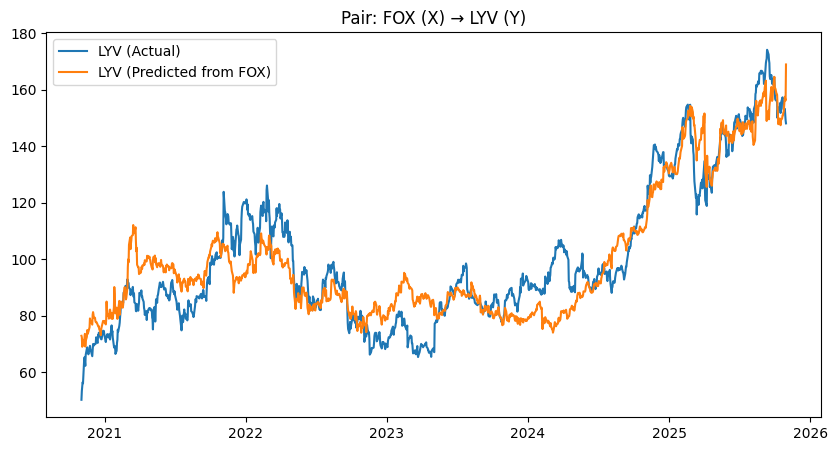

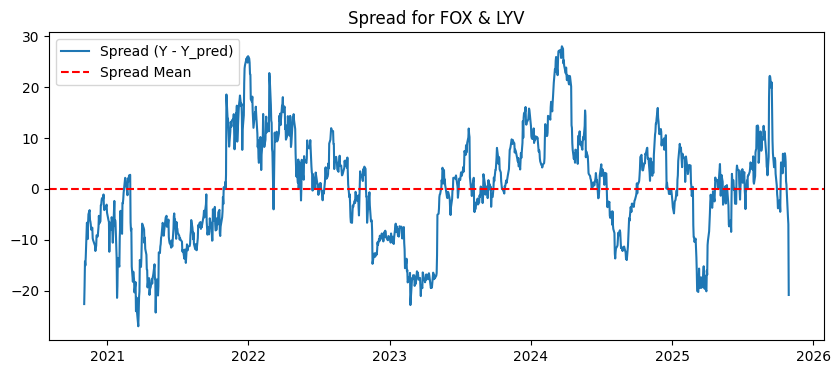

In [77]:
sym1 = "FOX"
sym2 = "LYV"
pair_results = analyze_pair(data_dict, sym1, sym2)

We have successfully visualized the spread as the residuals of the linear regression model. 

Now the spreads may vary among asset classes, it would be ideal to standardize them into a single scalar to facilitate comparison and strategy formulation. We can do this by converting the spread into Z-scores.

## Converting to Z-score

We use Z-score to measure how many standard deviations the daily spread deviates from its mean.

For stock prices, which are inherently volatile, we use a moving average approach to calculate the mean and standard deviation. Here each daily spread would have corresponding running mean and standard deviation based on the collection of the spreads in the rolling window.

In [78]:
def convert_zscore(df, sym1, sym2, window_size=10):
    # compute rolling mean, std, z-score
    df['Spread_MA'] = df['Spread'].rolling(window_size).mean()
    df['Spread_std'] = df['Spread'].rolling(window_size).std()
    df['Zscore'] = (df['Spread'] - df['Spread_MA']) / df['Spread_std']

    # compute upper/lower bounds (1 std dev)
    df['Upper_Bound'] = df['Spread_MA'] + df['Spread_std']
    df['Lower_Bound'] = df['Spread_MA'] - df['Spread_std']

    # spread plot with upper/lower bound
    plt.figure(figsize=(16, 8))
    plt.plot(df.index, df["Spread"], label="Spread", color="blue")
    plt.plot(df.index, df["Spread_MA"], label="Rolling Mean", color="black", linestyle="--")
    plt.plot(df.index, df["Upper_Bound"], label="+1 Std Dev", color="green", linestyle="--")
    plt.plot(df.index, df["Lower_Bound"], label="-1 Std Dev", color="red", linestyle="--")
    plt.title(f"Spread with ±1 Std Bounds (Window={window_size}): {sym1}, {sym2}")
    plt.legend()
    plt.show()

    # z-score plot
    plt.figure(figsize=(16, 8))
    plt.plot(df.index, df["Zscore"], label="Z-Score of Spread", color="purple")
    plt.axhline(0, color="black", linestyle="--", lw=1)
    plt.axhline(2.0, color="green", linestyle="--", lw=1, label="+2 Z")
    plt.axhline(1.0, color="green", linestyle="--", lw=1, label="+1 Z")
    plt.axhline(-1.0, color="red", linestyle="--", lw=1, label="-1 Z")
    plt.axhline(-2.0, color="red", linestyle="--", lw=1, label="-2 Z")
    plt.title(f"Z-Score of Spread (Window={window_size}): {sym1}, {sym2}")
    plt.legend()
    plt.show()

    return df


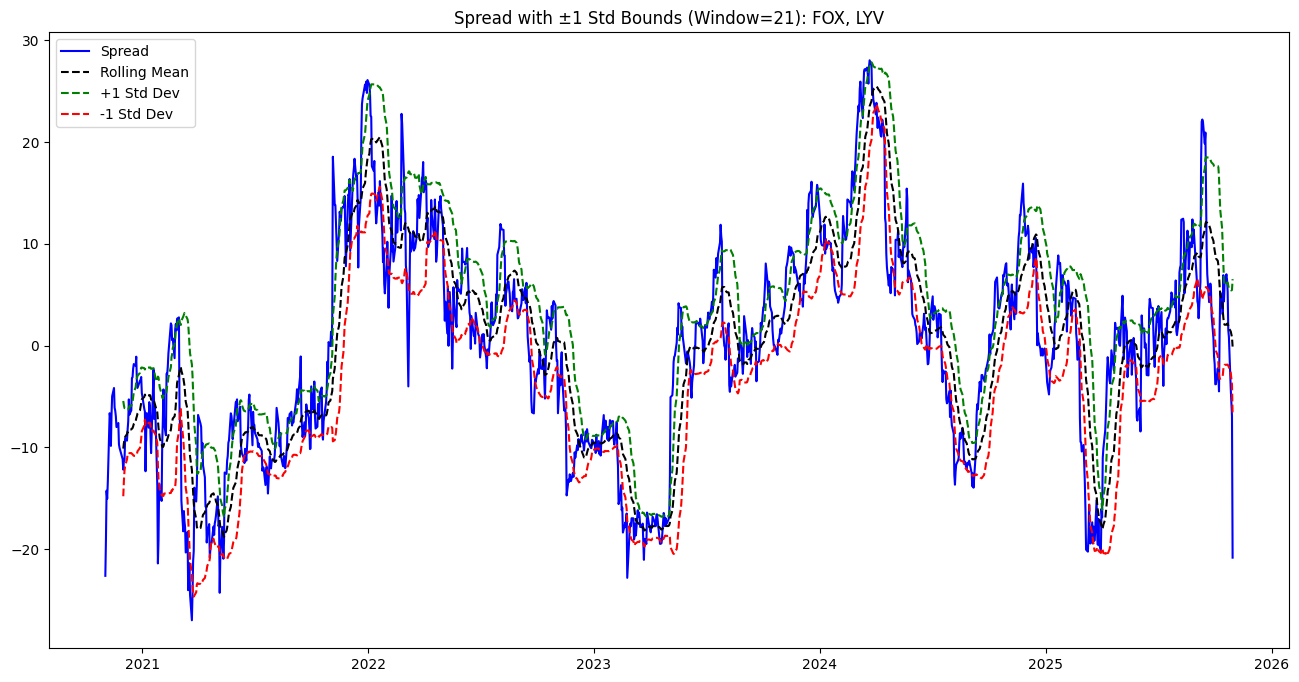

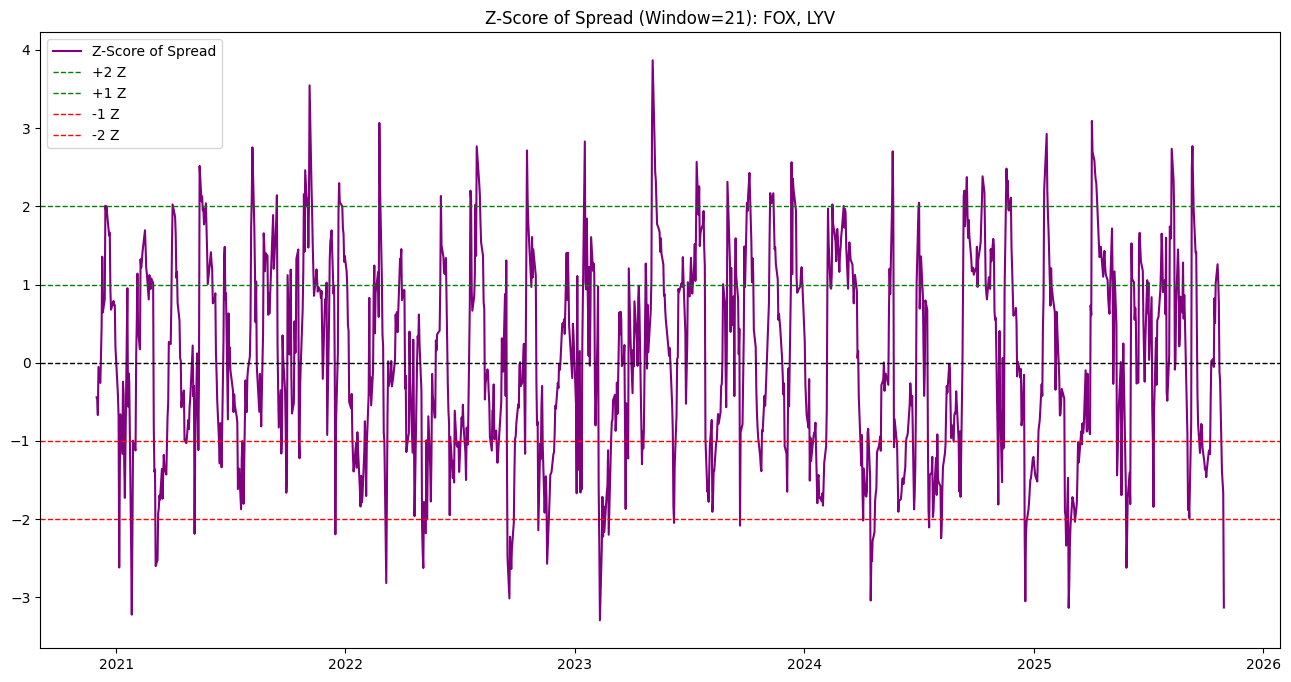

In [79]:
df_zscore = convert_zscore(pair_results['df'], sym1, sym2, window_size=21)

## Strategy Formulation & Backtesting
After successfully converting the spread into Z-scores, we can use them to generate trading signals:
- Long Entry: Enter a long position in the first stock when the Z-score falls below a preset negative threshold (eg. -2).
- Long Exit: Exit the long position in the first stock when the Z-score crosses above a less extreme negative threshold (eg., -1).
- Short Entry: Enter a short position in the second stock when the Z-score exceeds a preset positive threshold (eg., 2).
- Short Exit: Exit the short position in the second stock when the Z-score crosses below a less extreme positive threshold (eg., 1).

In [80]:
def run_pair_trading(sym1, sym2, data_dict, df_zscore, window_size=10, initial_equity=100_000.0):
    # align close prices
    df1 = data_dict[sym1]["Close"].rename("X")
    df2 = data_dict[sym2]["Close"].rename("Y")
    df = pd.concat([df1, df2], axis=1, join="inner").dropna().sort_index()

    assert len(df) >= window_size, f"Not enough data for {sym1}-{sym2}"
   
    df = df.join(df_zscore, how="inner", rsuffix="_zscore")

    assert "Zscore" in df and not df["Zscore"].isna().all(), f"Missing or invalid Zscore data for {sym1}-{sym2}"

    # determine positions on each pair
    df["x_position"] = np.nan
    df["y_position"] = np.nan

    # zscore > 2 => Short X, Long Y
    df.loc[df["Zscore"] > 2, ["x_position", "y_position"]] = [-1, 1]

    # -1 < zscore < 1 => Exit
    df.loc[(df["Zscore"] > -1) & (df["Zscore"] < 1), ["x_position", "y_position"]] = [0, 0]

    # zscore < -2 => Long X, Short Y
    df.loc[df["Zscore"] < -2, ["x_position", "y_position"]] = [1, -1]

    # Forward-fill positions in between signals
    df["x_position"] = df["x_position"].ffill().fillna(0)
    df["y_position"] = df["y_position"].ffill().fillna(0)

    # calculate daily returns from each pair
    df["x_return"] = df["X"].pct_change().fillna(0.0)
    df["y_return"] = df["Y"].pct_change().fillna(0.0)

    # equity Allocation
    df["x_notional"] = 0.02 * initial_equity
    df["y_notional"] = 0.02 * initial_equity

    # daily PnL for each pair
    df["daily_pnl_x"] = df["x_position"].shift(1) * df["x_notional"] * df["x_return"]
    df["daily_pnl_y"] = df["y_position"].shift(1) * df["y_notional"] * df["y_return"]
    df[["daily_pnl_x", "daily_pnl_y"]] = df[["daily_pnl_x", "daily_pnl_y"]].fillna(0.0)

    df["daily_pnl"] = df["daily_pnl_x"] + df["daily_pnl_y"]
    df["equity"] = initial_equity + df["daily_pnl"].cumsum()

    # performance metrics
    final_equity = df["equity"].iloc[-1]
    total_return_pct = (final_equity - initial_equity) / initial_equity

    df["equity_return"] = df["equity"].pct_change().fillna(0.0)
    ann_factor = 252
    mean_daily_ret = df["equity_return"].mean()
    std_daily_ret = df["equity_return"].std()

    if std_daily_ret != 0:
        sharpe_ratio = (mean_daily_ret / std_daily_ret) * np.sqrt(ann_factor)
    else:
        sharpe_ratio = np.nan

    neg_returns = df.loc[df["equity_return"] < 0, "equity_return"]
    std_downside = neg_returns.std() if not neg_returns.empty else np.nan
    if std_downside and std_downside != 0:
        sortino_ratio = (mean_daily_ret / std_downside) * np.sqrt(ann_factor)
    else:
        sortino_ratio = np.nan

    df["running_max"] = df["equity"].cummax()
    df["drawdown"] = (df["equity"] / df["running_max"]) - 1
    max_drawdown = df["drawdown"].min()

    # trade-by-trade details
    df["trade_signal"] = (df["x_position"].diff().abs() > 0) | (df["y_position"].diff().abs() > 0)
    trades = df[df["trade_signal"]].copy()
    trades["entry_date"] = trades.index
    trades["exit_date"] = trades["entry_date"].shift(-1)
    trades["pnl"] = trades["daily_pnl"]
    trades["x_position"] = trades["x_position"]
    trades["y_position"] = trades["y_position"]

    trades_df = trades[["entry_date", "exit_date", "x_position", "y_position", "pnl"]]
    num_trades = len(trades_df)
    win_rate = (trades_df[trades_df["pnl"] > 0].shape[0] / num_trades) if num_trades > 0 else np.nan

    metrics = {
        "sym1": sym1,
        "sym2": sym2,
        "final_equity": final_equity,
        "total_return_pct": total_return_pct,
        "sharpe_ratio": sharpe_ratio,
        "sortino_ratio": sortino_ratio,
        "max_drawdown_pct": max_drawdown,
        "num_trades": num_trades,
        "win_rate_pct": 100.0 * win_rate if not np.isnan(win_rate) else np.nan
    }

    return {
        "df": df,
        "metrics": metrics,
        "trades_df": trades_df
    }

In [81]:
pair_trading = run_pair_trading(sym1, sym2, data_dict, df_zscore)

for key, value in pair_trading['metrics'].items():
    print(f"{key} : {value}")

sym1 : FOX
sym2 : LYV
final_equity : 99718.0288463458
total_return_pct : -0.0028197115365420178
sharpe_ratio : -0.13894973786941545
sortino_ratio : -0.11136674900122276
max_drawdown_pct : -0.01070718054554487
num_trades : 101
win_rate_pct : 1.9801980198019802
